In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import subprocess
import matplotlib.pyplot as plt
import utils
import autolens as al
from autoconf import conf
import shlex

# setting pyautolens config and output files
conf.instance.push(
    new_path='./config_autolens',
    output_path=f'./autolens_output'
)
# setting our simulations path
simulations_pre_path = './simulations/fits_files/i/'
config_sextractor_path = './config_sextractor/'
%matplotlib inline

In [2]:
test_dataset = pd.read_csv('./test_dataset.csv')
test_dataset.head()

,Unnamed: 0,OBJID-g,H0-g,Om0-g,exposure_time-g,numPix-g,pixel_scale-g,psf_type-g,read_noise-g,ccd_gain-g,...,PLANE_1-REDSHIFT-g,PLANE_2-REDSHIFT-g,PLANE_1-REDSHIFT-r,PLANE_2-REDSHIFT-r,PLANE_1-REDSHIFT-i,PLANE_2-REDSHIFT-i,PLANE_1-REDSHIFT-z,PLANE_2-REDSHIFT-z,PLANE_1-REDSHIFT-Y,PLANE_2-REDSHIFT-Y
0,1501,1502,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.520542,1.401964,0.520542,1.401964,0.520542,1.401964,0.520542,1.401964,0.520542,1.401964
1,2586,2587,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.432048,2.126668,0.432048,2.126668,0.432048,2.126668,0.432048,2.126668,0.432048,2.126668
2,2653,2654,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.870553,3.289295,0.870553,3.289295,0.870553,3.289295,0.870553,3.289295,0.870553,3.289295
3,1055,1056,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.856923,2.497602,0.856923,2.497602,0.856923,2.497602,0.856923,2.497602,0.856923,2.497602
4,705,706,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,...,0.566559,3.057067,0.566559,3.057067,0.566559,3.057067,0.566559,3.057067,0.566559,3.057067


In [5]:
list(test_dataset.columns)

['Unnamed: 0',
 'OBJID-g',
 'H0-g',
 'Om0-g',
 'exposure_time-g',
 'numPix-g',
 'pixel_scale-g',
 'psf_type-g',
 'read_noise-g',
 'ccd_gain-g',
 'seeing-g',
 'magnitude_zero_point-g',
 'sky_brightness-g',
 'num_exposures-g',
 'NUMBER_OF_NOISE_SOURCES-g',
 'CONFIGURATION_LABEL-g',
 'CONFIGURATION_NAME-g',
 'NUMBER_OF_PLANES-g',
 'PLANE_1-NUMBER_OF_OBJECTS-g',
 'PLANE_1-OBJECT_1-NAME-g',
 'PLANE_2-NUMBER_OF_OBJECTS-g',
 'PLANE_2-OBJECT_1-NAME-g',
 'PLANE_1-OBJECT_1-REDSHIFT-g',
 'PLANE_1-OBJECT_1-NUMBER_OF_LIGHT_PROFILES-g',
 'PLANE_1-OBJECT_1-NUMBER_OF_SHEAR_PROFILES-g',
 'PLANE_1-OBJECT_1-NUMBER_OF_MASS_PROFILES-g',
 'PLANE_1-OBJECT_1-HOST-g',
 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-NAME-g',
 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g',
 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_x-g',
 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_y-g',
 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g',
 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g',
 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-e1-g',
 'PLANE_1-OBJECT_1-LI

In [3]:
system = 4

In [4]:
objid = int(test_dataset['OBJID-g'][system])
pixel_scale = float(test_dataset['pixel_scale-g'][system])
seeing = float(test_dataset['seeing-i'][system])
sky_rms = float(test_dataset['sky_brightness-i'][system])
ccd_gain = float(test_dataset['ccd_gain-i'][system])
mag_zero_point = float(test_dataset['magnitude_zero_point-i'][system])
num_pix = int(test_dataset['numPix-i'][system])
shape = (num_pix, num_pix)
mag_gamma = 10**(-0.4*(mag_zero_point-sky_rms))

expo_time = float(test_dataset['exposure_time-i'][system])
#zl = float(test_dataset['PLANE_1-REDSHIFT-g'][system])
#zs = float(test_dataset['PLANE_2-REDSHIFT-g'][system])
#read_noise = float(test_dataset['read_noise-i'][system])

In [5]:
ccd_gain

6.083

In [8]:
objid, seeing, ccd_gain, mag_zero_point, pixel_scale, mag_gamma, sky_rms, expo_time

(706, 0.943, 6.083, 26.75, 0.263, 0.0010675789450994952, 19.321, 90.0)

In [6]:
image_i=fits.open(simulations_pre_path+str(objid-1)+'.fits')[0].data

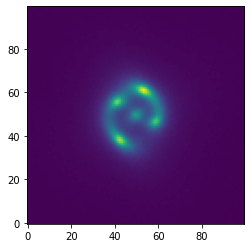

In [7]:
plt.imshow(image_i, origin='lower')

In [8]:
teste = utils.lens_light_test(image_i)
has_lens_light, f, x, y = teste.test()

In [9]:
has_lens_light

True

In [10]:
finder = utils.find_radius(pre_set_sigma=3, image_array=image_i)
norm, center, mask_radius= finder.get_radius() # gaussian normalization, center position (1-d) and radius (sigma)

radius_value = mask_radius*float(pixel_scale)*1.5
if radius_value > 3.:
    radius_value = 3.

mask = al.Mask2D.circular(shape_native=shape, pixel_scales=pixel_scale, radius=radius_value)

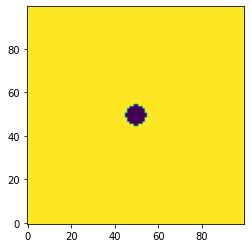

In [11]:
plt.imshow(mask, origin='lower')

In [12]:
fits_path = simulations_pre_path+str(objid-1)+'.fits'

In [13]:
if has_lens_light:
    subprocess.call(['mv', fits_path, config_sextractor_path])

In [14]:
sextractor_cmd = 'sex ' + str(str(objid-1)+ '.fits -c ./default.sex -DETECT_THRESH ' + str(np.var(image_i)) + ' -ANALYSIS_THRESH ' + str(np.var(image_i)) + ' -MAG_ZEROPOINT ' + str(mag_zero_point) + ' -MAG_GAMMA ' + str(mag_gamma) + ' -GAIN ' + str(ccd_gain) + ' -PIXEL_SCALE ' + str(pixel_scale) + ' -SEEING_FWHM ' + str(seeing))

In [15]:
subprocess.Popen(shlex.split(sextractor_cmd), cwd="/home/joao/Update_ALF/config_sextractor/")

> 
----- SExtractor 2.19.5 started on 2022-04-28 at 15:44:34 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for 2586.fits
----- Measuring from: 2586.fits
      "Unnamed" / no ext. header / 100x100 / 64 bits (floats)
Detection+Measurement image: > Setting up background maps
> Filtering background map(s)
> Computing background d-map
> Computing background-noise d-map
(M+D) Background: 0.30973    RMS: 0.290743   / Threshold: 10.4398    
> Scanning image


> Line:   25  Objects:        0 detected /        0 sextracted
> Line:   50  Objects:        0 detected /        0 sextracted
> Line:   75  Objects:        1 detected /        0 sextracted
> Line:  100  Objects:        1 detected /        0 sextracted
> Line:  100  Objects:        1 detected /        1 sextracted
      Objects: detected 1        / sextracted 1               

> Closing files
> 
> All done (in 0.0 s: 23326.3 lines/s , 233.3 detections/s)


In [16]:
check=fits.open('./config_sextractor/check.fits')[0].data

In [17]:
for i in range(0, len(check)):
    for j in range(0, len(check[i])):
        if check[i][j] > 0:
            check[i][j] = 1

In [18]:
subprocess.call(['mv', config_sextractor_path+str(str(objid-1))+'.fits', simulations_pre_path])

0

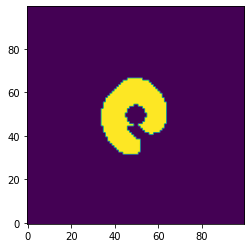

In [19]:
plt.imshow(check+mask, origin='lower')

In [20]:
import os

In [27]:
os.makedirs('./results/1502', exist_ok=True)